<a href="https://colab.research.google.com/github/sonmanwoo/PSA_Study/blob/main/211201_MW_ml_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from pycaret.regression import *
raw_df = pd.read_csv("Raw_data_ML-R8_211120_MW.csv", encoding='cp949')

In [ ]:
''' Model Build and Checking  -  Section '''
##################################################################################
#Auto ML을 이용한 Regression Model 구축 (Recovery)

from pycaret.regression import *
exp_reg101 = setup(data = raw_df, numeric_features=['Temp. (°C)'], ignore_features=['Purity (%)', 'f_VC'],
                   target = 'Recovery (%)', session_id=123, log_experiment = False)

,Description,Value
0,session_id,123
1,Target,Recovery (%)
2,Original Data,"(600, 8)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(419, 5)"


In [ ]:
best1 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,1.2288,3.0587,1.7156,0.9915,0.0293,0.0200,0.1860
lightgbm,Light Gradient Boosting Machine,1.5104,4.3772,2.0668,0.9878,0.0365,0.0248,0.0110
gbr,Gradient Boosting Regressor,1.6335,4.9550,2.2047,0.9861,0.0378,0.0264,0.0060
et,Extra Trees Regressor,1.8163,8.3883,2.8430,0.9776,0.0539,0.0321,0.0740
rf,Random Forest Regressor,2.3714,10.4182,3.1873,0.9713,0.0601,0.0412,0.0730
dt,Decision Tree Regressor,3.7624,26.0623,5.0512,0.9272,0.0934,0.0645,0.0040
lr,Linear Regression,4.5522,32.3500,5.6446,0.9120,0.0925,0.0727,0.2420
lar,Least Angle Regression,4.5522,32.3500,5.6446,0.9120,0.0925,0.0727,0.0030
br,Bayesian Ridge,4.5533,32.3564,5.6452,0.9120,0.0927,0.0727,0.0040
huber,Huber Regressor,4.4447,33.4592,5.7247,0.9098,0.0926,0.0713,0.0050


In [ ]:
et=create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.2507,11.8639,3.4444,0.9762,0.0744,0.0441
1,2.0147,9.8766,3.1427,0.9625,0.0530,0.0333
2,2.1812,13.7247,3.7047,0.9659,0.0620,0.0378
3,1.9454,8.4826,2.9125,0.9780,0.0500,0.0309
4,1.6421,8.1002,2.8461,0.9759,0.0618,0.0313
5,1.3678,5.2532,2.2920,0.9833,0.0387,0.0217
6,2.2086,10.9362,3.3070,0.9779,0.0715,0.0440
7,1.6483,6.9377,2.6340,0.9790,0.0404,0.0248
8,1.5872,5.3227,2.3071,0.9870,0.0577,0.0326
9,1.3171,3.3857,1.8400,0.9901,0.0302,0.0205


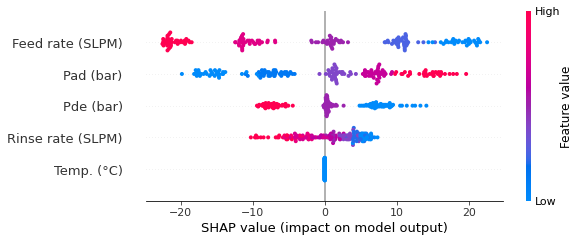

In [ ]:
interpret_model(et)

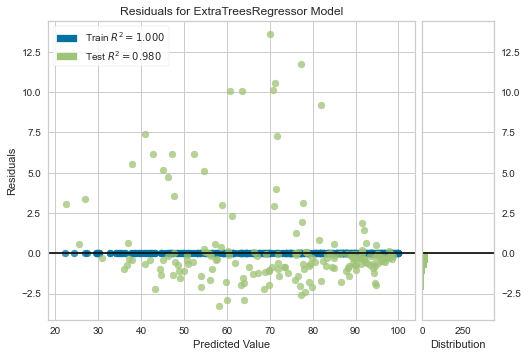

In [ ]:
plot_model(et)

In [ ]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

IntProgress(value=0, description='Processing: ', max=5)

In [ ]:
pred_holdout=predict_model(et)
et_final = finalize_model(et)
predictions=predict_model(et_final, data=raw_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.5243,7.7404,2.7821,0.9799,0.0497,0.0275


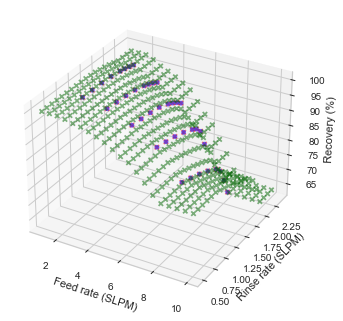

In [ ]:
target_Pa = 6.4
target_t = 60
target_Pd = 0.05
data_split_num=20
X_test=pd.Series(np.linspace(1,10,data_split_num))
Y_test=pd.Series(np.linspace(0.5,2.4,data_split_num))
test_df = pd.DataFrame(index=range(0,data_split_num**2),columns=raw_df.columns[:-3])
test_df['Pad (bar)']=target_Pa
test_df['Temp. (°C)']=target_t
# test_df['Feed rate (SLPM)']=41
# test_df['Rinse rate (SLPM)']=41

test_df['Pde (bar)']=target_Pd
for i in range(data_split_num):
    test_df['Feed rate (SLPM)'][data_split_num*i:data_split_num*(i+1)] = X_test[i]
    test_df['Rinse rate (SLPM)'][data_split_num*i:data_split_num*(i+1)] = Y_test

predictions_test=predict_model(et_final, data=test_df)
fig = plt.figure()
ax = fig.gca(projection='3d')
X=raw_df[(raw_df['Pad (bar)']==target_Pa) & (raw_df['Temp. (°C)']==target_t) & (raw_df['Pde (bar)']==target_Pd)]['Feed rate (SLPM)']
Y=raw_df[(raw_df['Pad (bar)']==target_Pa) & (raw_df['Temp. (°C)']==target_t) & (raw_df['Pde (bar)']==target_Pd)]['Rinse rate (SLPM)']
Z=raw_df[(raw_df['Pad (bar)']==target_Pa) & (raw_df['Temp. (°C)']==target_t) & (raw_df['Pde (bar)']==target_Pd)]['Recovery (%)']
Zdot=predictions[(predictions['Pad (bar)']==target_Pa) & (predictions['Temp. (°C)']==target_t) & (predictions['Pde (bar)']==target_Pd)]['Label']
X_t=test_df[test_df['Pad (bar)']==target_Pa]['Feed rate (SLPM)']
Y_t=test_df[test_df['Pad (bar)']==target_Pa]['Rinse rate (SLPM)']
Zdot_test=predictions_test[predictions_test['Pad (bar)']==target_Pa]['Label']
ax.scatter(X,Y,Z, c='blue', alpha=0.5)
ax.scatter(X,Y,Zdot, c='red', alpha=0.5, marker='x')
ax.scatter(X_t,Y_t,Zdot_test, c='darkgreen', alpha=0.5, marker='x')
ax.set_xlabel('Feed rate (SLPM)')
ax.set_ylabel('Rinse rate (SLPM)')
ax.set_zlabel('Recovery (%)')
plt.show()

In [ ]:
save_csv = pd.DataFrame({'train_Feed rate (SLPM)' : X, 
                        'train_Rinse rate (SLPM)' : Y,
                        'train_Purity (%)' : Z,
                        'train_predict_Recovery (%)' : Zdot,
                        'test_Feed rate (SLPM)' : X_t,
                        'test_Rinse rate (SLPM)' : Y_t,
                        'test_predict_Recovery (%)' : Zdot_test
                        }).to_csv('Feed_Rinse_Recovery_Pa{0}_t{1}_Pd{2}.csv'.format(target_Pa,target_t,target_Pd))

In [ ]:
from pycaret.regression import *
exp_reg102 = setup(data = raw_df, numeric_features=['Temp. (°C)'], ignore_features=['Recovery (%)','f_VC'],
                   target = 'Purity (%)', session_id=123, log_experiment = False)

,Description,Value
0,session_id,123
1,Target,Purity (%)
2,Original Data,"(600, 8)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(419, 5)"


In [ ]:
best2 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.3983,0.3847,0.5983,0.9946,0.0070,0.0046,0.2150
gbr,Gradient Boosting Regressor,0.7195,0.9433,0.9551,0.9849,0.0111,0.0081,0.0060
et,Extra Trees Regressor,0.6482,1.0686,1.0189,0.9830,0.0119,0.0075,0.0750
lightgbm,Light Gradient Boosting Machine,0.8411,1.5378,1.2147,0.9771,0.0147,0.0098,0.0190
rf,Random Forest Regressor,0.8230,1.5545,1.2277,0.9744,0.0144,0.0095,0.0740
dt,Decision Tree Regressor,1.2159,3.1721,1.7705,0.9478,0.0205,0.0140,0.0040
knn,K Neighbors Regressor,1.3474,3.9551,1.9606,0.9375,0.0227,0.0155,0.0150
ada,AdaBoost Regressor,2.8695,10.6880,3.2502,0.8282,0.0359,0.0314,0.0090
lr,Linear Regression,2.6655,11.4939,3.3326,0.8280,0.0393,0.0305,0.0040
lar,Least Angle Regression,2.6655,11.4939,3.3326,0.8280,0.0393,0.0305,0.0040


In [ ]:
et2=create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8522,1.9591,1.3997,0.9834,0.0165,0.0102
1,0.5519,0.7494,0.8657,0.9873,0.0106,0.0063
2,0.5620,0.9560,0.9777,0.9799,0.0111,0.0064
3,0.6448,1.0263,1.0131,0.9915,0.0126,0.0078
4,0.5876,0.6568,0.8104,0.9870,0.0093,0.0066
5,0.7325,1.2938,1.1375,0.9772,0.0128,0.0083
6,0.5897,1.0476,1.0235,0.9867,0.0115,0.0067
7,0.5602,0.6917,0.8317,0.9873,0.0095,0.0063
8,0.7254,1.4462,1.2026,0.9648,0.0145,0.0085
9,0.6760,0.8593,0.9270,0.9851,0.0106,0.0077


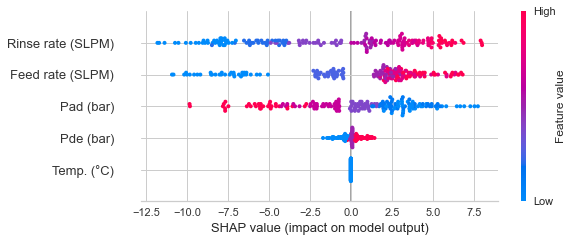

In [ ]:
interpret_model(et2)

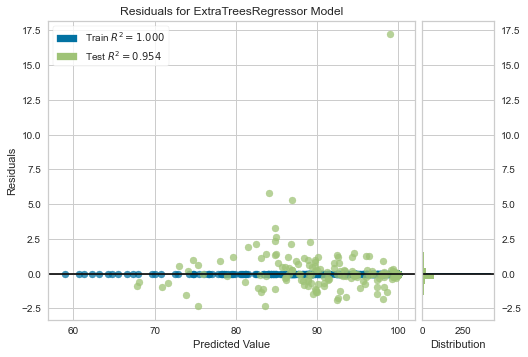

In [ ]:
plot_model(et2)

In [ ]:
evaluate_model(et2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

IntProgress(value=0, description='Processing: ', max=5)

In [ ]:
pred_holdout2=predict_model(et2)
et_final2 = finalize_model(et2)
predictions2=predict_model(et_final2, data=raw_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.7319,2.7245,1.6506,0.9539,0.0186,0.0085


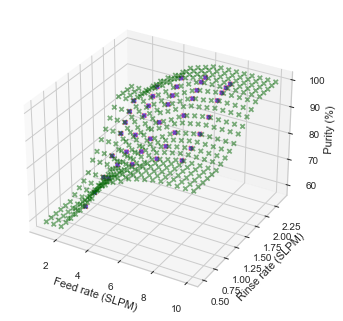

In [ ]:
target_Pa = 6.4
target_t = 60
target_Pd = 0.05
data_split_num=20
X_test=pd.Series(np.linspace(1,10,data_split_num))
Y_test=pd.Series(np.linspace(0.5,2.4,data_split_num))
test_df = pd.DataFrame(index=range(0,data_split_num**2),columns=raw_df.columns[:-3])
test_df['Pad (bar)']=target_Pa
test_df['Temp. (°C)']=target_t
# test_df['Feed rate (SLPM)']=41
# test_df['Rinse rate (SLPM)']=41

test_df['Pde (bar)']=target_Pd
for i in range(data_split_num):
    test_df['Feed rate (SLPM)'][data_split_num*i:data_split_num*(i+1)] = X_test[i]
    test_df['Rinse rate (SLPM)'][data_split_num*i:data_split_num*(i+1)] = Y_test

predictions_test2=predict_model(et_final2, data=test_df)
fig = plt.figure()
ax = fig.gca(projection='3d')
X=raw_df[(raw_df['Pad (bar)']==target_Pa) & (raw_df['Temp. (°C)']==target_t) & (raw_df['Pde (bar)']==target_Pd)]['Feed rate (SLPM)']
Y=raw_df[(raw_df['Pad (bar)']==target_Pa) & (raw_df['Temp. (°C)']==target_t) & (raw_df['Pde (bar)']==target_Pd)]['Rinse rate (SLPM)']
Z=raw_df[(raw_df['Pad (bar)']==target_Pa) & (raw_df['Temp. (°C)']==target_t) & (raw_df['Pde (bar)']==target_Pd)]['Purity (%)']
Zdot=predictions2[(predictions2['Pad (bar)']==target_Pa) & (predictions2['Temp. (°C)']==target_t) & (predictions2['Pde (bar)']==target_Pd)]['Label']
X_t=test_df[test_df['Pad (bar)']==target_Pa]['Feed rate (SLPM)']
Y_t=test_df[test_df['Pad (bar)']==target_Pa]['Rinse rate (SLPM)']
Zdot_test=predictions_test2[predictions_test2['Pad (bar)']==target_Pa]['Label']
ax.scatter(X,Y,Z, c='blue', alpha=0.5)
ax.scatter(X,Y,Zdot, c='red', alpha=0.5, marker='x')
ax.scatter(X_t,Y_t,Zdot_test, c='darkgreen', alpha=0.5, marker='x')
ax.set_xlabel('Feed rate (SLPM)')
ax.set_ylabel('Rinse rate (SLPM)')
ax.set_zlabel('Purity (%)')
plt.show()

In [ ]:
save_csv = pd.DataFrame({'train_Feed rate (SLPM)' : X, 
                        'train_Rinse rate (SLPM)' : Y,
                        'train_Purity (%)' : Z,
                        'train_predict_Recovery (%)' : Zdot,
                        'test_Feed rate (SLPM)' : X_t,
                        'test_Rinse rate (SLPM)' : Y_t,
                        'test_predict_Purity (%)' : Zdot_test
                        }).to_csv('Feed_Rinse_Purity_Pa{0}_t{1}_Pd{2}.csv'.format(target_Pa,target_t,target_Pd))

In [ ]:
from pycaret.regression import *
exp_reg103 = setup(data = raw_df, numeric_features=['Temp. (°C)'], ignore_features=['Recovery (%)','Purity (%)'],
                   target = 'f_VC', session_id=123, log_experiment = False)

,Description,Value
0,session_id,123
1,Target,f_VC
2,Original Data,"(600, 8)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(419, 5)"


In [ ]:
best3 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.0192,0.0007,0.0255,0.9955,0.0094,0.0115,0.0950
et,Extra Trees Regressor,0.0296,0.0017,0.0404,0.9889,0.0156,0.0184,0.0740
gbr,Gradient Boosting Regressor,0.0327,0.0017,0.0412,0.9885,0.0153,0.0196,0.0070
lightgbm,Light Gradient Boosting Machine,0.0335,0.0019,0.0433,0.9874,0.0171,0.0213,0.0200
rf,Random Forest Regressor,0.0362,0.0023,0.0467,0.9853,0.0176,0.0221,0.0740
dt,Decision Tree Regressor,0.0472,0.0039,0.0616,0.9747,0.0231,0.0287,0.0040
ada,AdaBoost Regressor,0.0894,0.0125,0.1105,0.9185,0.0416,0.0552,0.0090
knn,K Neighbors Regressor,0.0987,0.0151,0.1219,0.8981,0.0459,0.0606,0.0150
lr,Linear Regression,0.1304,0.0249,0.1571,0.8326,0.0576,0.0782,0.0050
lar,Least Angle Regression,0.1304,0.0249,0.1571,0.8326,0.0576,0.0782,0.0040


In [ ]:
et3=create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0189,0.0006,0.0251,0.9966,0.0100,0.0121
1,0.0337,0.0020,0.0447,0.9910,0.0176,0.0203
2,0.0268,0.0014,0.0373,0.9882,0.0152,0.0179
3,0.0353,0.0024,0.0493,0.9892,0.0186,0.0212
4,0.0268,0.0011,0.0335,0.9896,0.0132,0.0170
5,0.0351,0.0019,0.0441,0.9867,0.0165,0.0210
6,0.0358,0.0025,0.0504,0.9844,0.0187,0.0216
7,0.0248,0.0011,0.0332,0.9916,0.0140,0.0172
8,0.0268,0.0016,0.0399,0.9869,0.0138,0.0153
9,0.0323,0.0022,0.0466,0.9850,0.0189,0.0207


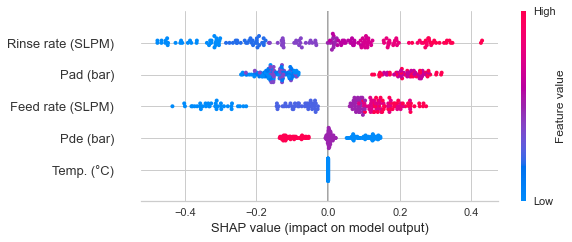

In [ ]:
interpret_model(et3)

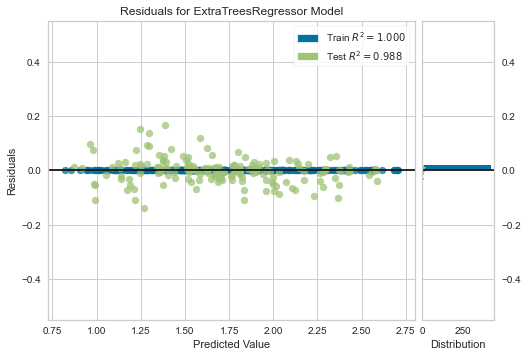

In [ ]:
plot_model(et3)

In [ ]:
evaluate_model(et3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

IntProgress(value=0, description='Processing: ', max=5)

In [ ]:
pred_holdout3=predict_model(et3)
et_final3 = finalize_model(et3)
predictions3=predict_model(et_final3, data=raw_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0307,0.0020,0.0447,0.9879,0.0182,0.0203


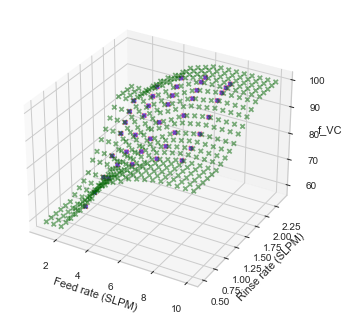

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X=raw_df[(raw_df['Pad (bar)']==target_Pa) & (raw_df['Temp. (°C)']==target_t) & (raw_df['Pde (bar)']==target_Pd)]['Feed rate (SLPM)']
Y=raw_df[(raw_df['Pad (bar)']==target_Pa) & (raw_df['Temp. (°C)']==target_t) & (raw_df['Pde (bar)']==target_Pd)]['Rinse rate (SLPM)']
Z=raw_df[(raw_df['Pad (bar)']==target_Pa) & (raw_df['Temp. (°C)']==target_t) & (raw_df['Pde (bar)']==target_Pd)]['Purity (%)']
Zdot=predictions2[(predictions2['Pad (bar)']==target_Pa) & (predictions2['Temp. (°C)']==target_t) & (predictions['Pde (bar)']==target_Pd)]['Label']
X_t=test_df[test_df['Pad (bar)']==target_Pa]['Feed rate (SLPM)']
Y_t=test_df[test_df['Pad (bar)']==target_Pa]['Rinse rate (SLPM)']
Zdot_test=predictions_test2[predictions_test2['Pad (bar)']==target_Pa]['Label']
ax.scatter(X,Y,Z, c='blue', alpha=0.5)
ax.scatter(X,Y,Zdot, c='red', alpha=0.5, marker='x')
ax.scatter(X_t,Y_t,Zdot_test, c='darkgreen', alpha=0.5, marker='x')
ax.set_xlabel('Feed rate (SLPM)')
ax.set_ylabel('Rinse rate (SLPM)')
ax.set_zlabel('f_VC')
plt.show()

In [ ]:
save_csv = pd.DataFrame({'train_Feed rate (SLPM)' : X, 
                        'train_Rinse rate (SLPM)' : Y,
                        'train_Purity (%)' : Z,
                        'train_predict_Recovery (%)' : Zdot,
                        'test_Feed rate (SLPM)' : X_t,
                        'test_Rinse rate (SLPM)' : Y_t,
                        'test_predict_Recovery (%)' : Zdot_test
                        }).to_csv('Feed_Rinse_f_VC_Pa{0}_t{1}_Pd{2}.csv'.format(target_Pa,target_t,target_Pd))
##################################################################################